In [1]:
#QUESTION:

#What is the best console as a product of the ratings of the games released on it?

In [2]:
#ENVIRONMENT INITIALISING

#import pandas for data visualisation
import pandas as pd

#import matplot and seaborn for visualising date data
import matplotlib.pyplot as plt
import seaborn as sns

#Set to colour blind friendly palette
sns.set(palette='flare')

#correct matplot compatibility error
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
# ignore warnings 
import warnings 
warnings.filterwarnings("ignore")

#import numpy for mean calculation
import numpy as np 

#import string to filter punctuation
import string
from string import punctuation

In [3]:
#DATA IMPORTING

#import the Meta Critic Scores (mcs) csv file
mcs = pd.read_csv('./output/MetaCritScores.csv')
mcs

,position,title,platform,pub_date,rating,genre
0,1,SoulCalibur,Dreamcast,1999-09-08,98,action
1,2,Super Mario Galaxy,Wii,2007-11-12,97,action
2,3,Super Mario Galaxy 2,Wii,2010-05-23,97,action
3,4,Perfect Dark,Nintendo 64,2000-05-22,97,action
4,5,Metroid Prime,GameCube,2002-11-17,97,action
...,...,...,...,...,...,...
36252,105,ECW Anarchy Rulz,Dreamcast,2000-12-30,38,wrestling
36253,106,The Simpsons Wrestling,PlayStation,2001-04-12,32,wrestling
36254,107,Mucha Lucha! Mascaritas of the Lost Code,Game Boy Advance,2003-11-18,26,wrestling
36255,108,Hulk Hogan's Main Event,Xbox 360,2011-10-11,26,wrestling


In [4]:
#DATA INITIALISING

#Convert date-time column to data-time datatype
mcs['pub_date'] = pd.to_datetime(mcs['pub_date'])

#Check pub_date column is stored as datetime
mcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   position  36257 non-null  int64         
 1   title     36257 non-null  object        
 2   platform  36257 non-null  object        
 3   pub_date  36257 non-null  datetime64[ns]
 4   rating    36257 non-null  int64         
 5   genre     36257 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.7+ MB


In [5]:
#DATA FILTERING

#Problem Example:
#mcs[mcs['title'] == "Legends of Wrestling II"]

#To remove redundant entries entered in multiple genres
#Group each title as individual platforms
#Use head(1) to take one entry for each title to remove genre redundnacy
#reset the index to merge the remaining titles with the top genre (tg) only  

tgmcs = mcs.copy()
tgmcs = tgmcs.groupby(['title','platform']).head(1).reset_index(drop=True)
tgmcs

,position,title,platform,pub_date,rating,genre
0,1,SoulCalibur,Dreamcast,1999-09-08,98,action
1,2,Super Mario Galaxy,Wii,2007-11-12,97,action
2,3,Super Mario Galaxy 2,Wii,2010-05-23,97,action
3,4,Perfect Dark,Nintendo 64,2000-05-22,97,action
4,5,Metroid Prime,GameCube,2002-11-17,97,action
...,...,...,...,...,...,...
25954,3043,Interstellar Trader 2,PC,2003-03-21,31,strategy
25955,3044,Big Oil: Build an Oil Empire,PC,2006-07-31,31,strategy
25956,3045,Dino Master,DS,2006-05-25,28,strategy
25957,3050,The Apprentice,PC,2006-02-28,25,strategy


In [6]:
#DATA PROCESSING FOR ANALYSIS

#create dataframe with mean rating of each platform
platform_rate = tgmcs.groupby('platform').mean().reset_index().drop('position',axis=1)

#create dataframe with first (.min) released game per platform
platform_date = pd.DataFrame(tgmcs.groupby('platform')['pub_date'].min()).reset_index()

#merge mean ratings and date dataframes by platforms and order from oldest to newest
platform_df = pd.merge(platform_date, platform_rate, on='platform', how= 'inner').sort_values('pub_date')

#rename dataframe columns for referencing
platform_df.columns = ['platform','date','rating']

#create a dictionary for companies releasing platforms
platdict = {'Nintendo':['3DS','DS','Game Boy Advance','GameCube','Nintendo 64', 'Switch', 'Wii', 'Wii U'],\
           'Sega':['Dreamcast'],\
           'Microsoft':['PC', 'Xbox', 'Xbox 360', 'Xbox One', 'Xbox Series X'],\
           'Sony':['PSP','PlayStation','PlayStation 2','PlayStation 3','PlayStation 4',\
                          'PlayStation 5','PlayStation Vita'],\
           'Google':['Stadia'],\
           'Apple':['iOS']}

#Expand the dictionary into a dataframe by iterating through each item
platform_comp = pd.concat(pd.DataFrame({'name':k, 'value':v}) for k, v in platdict.items())

#Assign referencable columns to the new dataframe
platform_comp.columns = ['company','platform']

#Merge the company data with the mean rating + date dataframe
platform_df = pd.merge(platform_df, platform_comp, on='platform', how= 'inner')
platform_df

,platform,date,rating,company
0,PC,1994-09-30,70.999098,Microsoft
1,PlayStation,1995-09-09,69.454976,Sony
2,Nintendo 64,1996-09-26,75.569620,Nintendo
3,Dreamcast,1999-09-08,71.991667,Sega
4,PlayStation 2,2000-10-21,68.249781,Sony
5,Game Boy Advance,2001-05-29,66.720322,Nintendo
6,Xbox,2001-10-29,69.373832,Microsoft
7,GameCube,2001-11-09,69.064516,Nintendo
8,DS,2004-11-16,64.331034,Nintendo
9,PSP,2005-03-14,67.941176,Sony


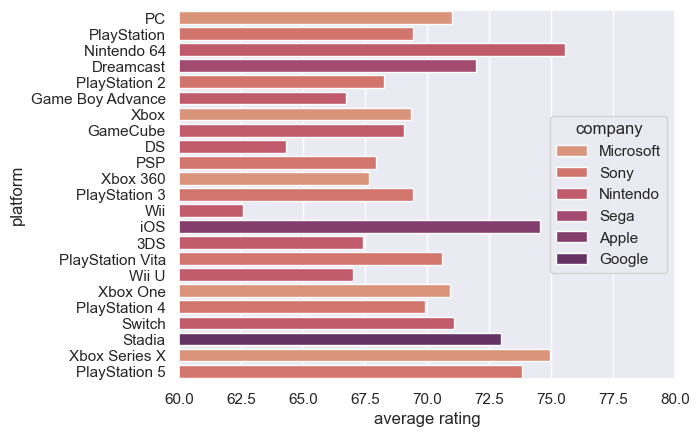

In [7]:
#DATA VISUALISATION

#Plot all platforms mean rating in time order with company information by colour
pplot = sns.barplot(data=platform_df, y='platform',x='rating', hue='company', dodge=False)
pplot.set(xlabel=('average rating'))

#Define Region of interest
pplot.set(xlim=(60,80));

#NOTE: There is an apparent trough in the data when plotted over time, let's investigate that on the company level.

In [8]:
#DATA REFINEMENT

#Group the platform dataframe by their company
compplot = platform_df.groupby('company')

#Isolate the Microsoft, Sony and Nintendo main console companies
MS = compplot.get_group('Microsoft')
PS = compplot.get_group('Sony')
NT = compplot.get_group('Nintendo')

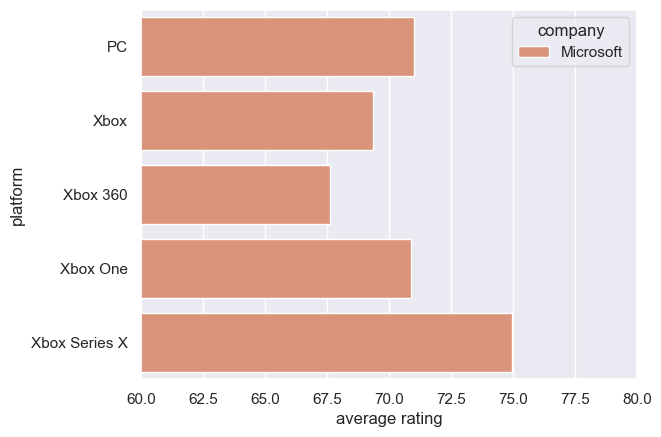

In [9]:
#DATA VISUALISATION

#Plot Microsoft Consoles by mean rating in time order for rating region of interest
pplot = sns.barplot(data=MS, y='platform',x='rating', hue='company', dodge=False)
pplot.set(xlabel=('average rating'))
pplot.set(xlim=(60,80));

#NOTE: Microsoft appears to trough early in rating as expected however the PC contains multiple major operating systems
#It may also be worthwhile to separate the PC bar into:
#pre-XP, XP 2001-10-25, Vista 2007-01-30, 7 2009-10-22, 8 2012-10-26, 10 2015-07-29, 11 2021-10-05
#allow + 1 year after after release start to switch over game development focus

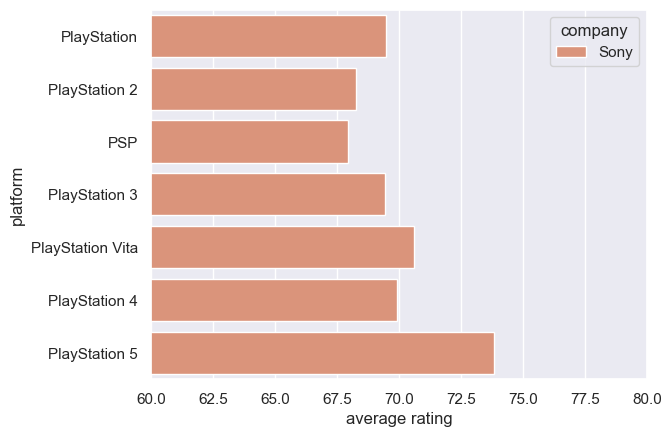

In [10]:
#DATA VISUALISATION

#Plot Sony Consoles by mean rating in time order for rating region of interest
pplot = sns.barplot(data=PS, y='platform',x='rating', hue='company', dodge=False)
pplot.set(xlabel=('average rating'))
pplot.set(xlim=(60,80));

#NOTE: Sony Consoles appear to trend upward in rating with a less pronounced dip
#Could the PS5 success be a result of the recency of it's release?
#Look at console rating as a product of only the first year of game releases

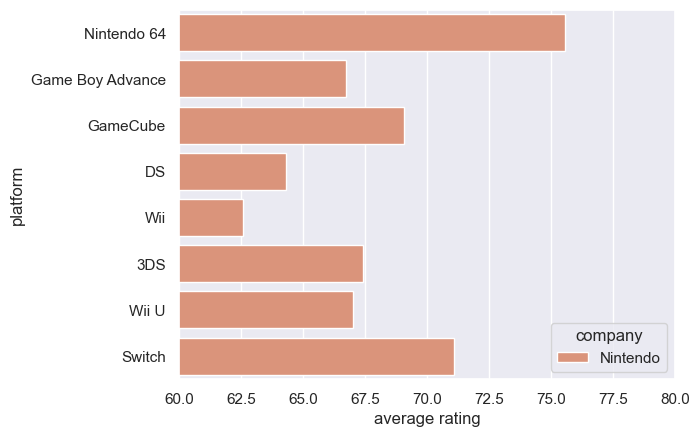

In [11]:
#DATA VISUALISATION

#Plot Nintendo Consoles by mean rating in time order for rating region of interest
pplot = sns.barplot(data=NT, y='platform',x='rating', hue='company', dodge=False)
pplot.set(xlabel=('average rating'))
pplot.set(xlim=(60,80));

#NOTE: Nintendos ambitious mould breaking approach to gaming innovation leads to the highest spread of ratings
#Looking at standard deviation one would expect the highest being nintendo as a company
#Individual console standard deviation in ratings would also be interesting to plot